In [1]:
import numpy as np
import pandas as pd
import time
import util

In [17]:
util.matplotlib_setup()
util.default_num_reps = 100

experiments = [
    [{'sample_size': 10 ** np.arange(3, 6)}, 'Sample size', 'sample_size', './data_pdf_files/abs_error_sample_size_1650495414.pkl'],
    [{'memo_units': 10 ** np.arange(1, 4)}, 'Memory units', 'memo_units', './data_pdf_files/abs_error_memo_units_1650495925.pkl'],
    [{'mean_diff': 10. ** np.arange(-3, 0)}, 'Difference between sample and reference means', 'mean_diff', './data_pdf_files/abs_error_mean_diff_1650496272.pkl'],
    [{'std_diff': 10. ** np.arange(-3, 0), 'mean_diff': (0,)}, 'Difference between sample and reference standard deviations', 'std_diff', './data_pdf_files/abs_error_std_diff_1650496616.pkl'],
]

In [3]:
for e in experiments:
    print(e[2])
    results = util.get_results(**e[0])
    timestamp = int(time.time())
    e.append('./data_pdf_files/abs_error_{}_{}.pkl'.format(e[2], timestamp))
    results.to_pickle(e[-1])
    

sample_size


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [17:40<00:00,  1.18s/it]

memo_units



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [08:30<00:00,  1.76it/s]

mean_diff



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [05:47<00:00,  2.59it/s]

std_diff



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [05:44<00:00,  2.62it/s]


./data_pdf_files/abs_error_sample_size_1650495414.pkl
./data_pdf_files/abs_error_memo_units_1650495925.pkl
./data_pdf_files/abs_error_mean_diff_1650496272.pkl
./data_pdf_files/abs_error_std_diff_1650496616.pkl


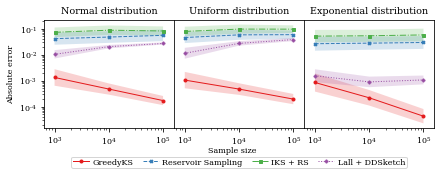

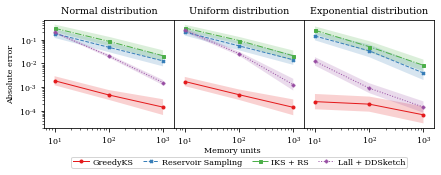

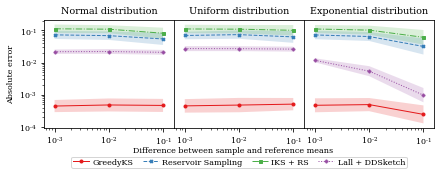

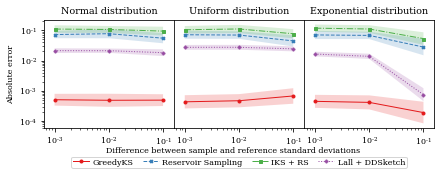

In [18]:
for e in experiments:
    print(e[-1])
    results = pd.read_pickle(e[-1])
    results.rename(columns={'IKS + Reservoir': 'IKS + RS'}, inplace=True)
    util.plot_errors(
        results,
        ['Normal distribution', 'Uniform distribution', 'Exponential distribution'],
        'Absolute error',
        e[1],
        e[2],
        "./data_pdf_files/abs_error_{}.pdf".format(e[2])
        )